In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

pd.set_option("display.max_columns", 999)
pd.get_option("display.max_columns")

pd.set_option("display.max_rows", 999)
pd.get_option("display.max_rows")

999

In [2]:
#Application Data
bureau = pd.read_csv('credit_Bureau_Modelling_Data.csv')
bureau.head()

FileNotFoundError: [Errno 2] No such file or directory: 'credit_Bureau_Modelling_Data.csv'

In [ ]:
# bureau total rows and column
bureau.shape

# 2. Data Cleaning And Exploration

In [4]:
def missing(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing(bureau)

,Total,Percent
EXT_SOURCE_1,146616,55.643646
EXT_SOURCE_3,18289,6.941034
min_loan_tenure,7197,2.731403
max_loan_tenure,7197,2.731403
avg_loan_tenure,2249,0.853540
EXT_SOURCE_2,520,0.197350
max_loan_payment_default_days,0,0.000000
consumer_loan,0,0.000000
TARGET,0,0.000000
total_loan,0,0.000000


In [5]:
# ETERNAL SOURCE CREDIT SCORE NOT AVAILABLE FILL WITH -1

bureau[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]] = bureau[["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].fillna(-1)

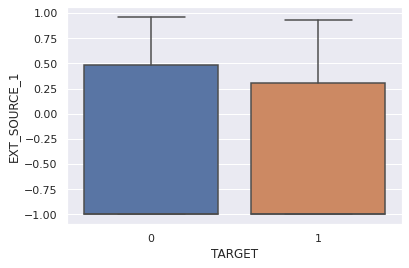

In [6]:
#sns.boxplot(bureau["EXT_SOURCE_1"], hue= bureau[""])
ax = sns.boxplot(x="TARGET", y="EXT_SOURCE_1", data=bureau)

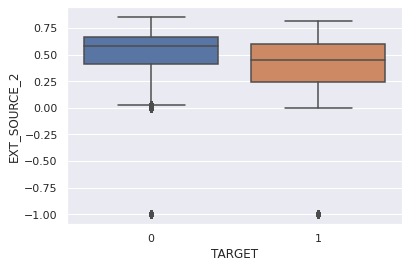

In [7]:
#sns.boxplot(bureau["EXT_SOURCE_1"], hue= bureau[""])
ax = sns.boxplot(x="TARGET", y="EXT_SOURCE_2", data=bureau)


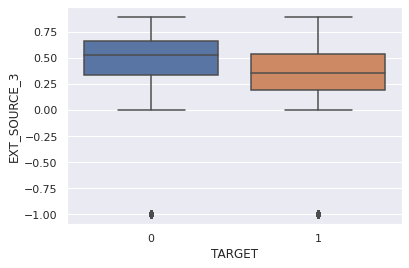

In [8]:
#sns.boxplot(bureau["EXT_SOURCE_1"], hue= bureau[""])
ax = sns.boxplot(x="TARGET", y="EXT_SOURCE_3", data=bureau)

In [9]:
# LESSER the External Sorce 1 score higher the chances of getting default
#<0.3 has more than 20% of the default %

In [10]:
#min_loan_tenure

bureau[bureau.min_loan_tenure.isnull()].head()

,SK_ID_CURR,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,total_loan,nbr_closed_sum,nbr_active_sum,nbr_sold_sum,nbr_bad_debt,consumer_loan,credit_card,car_loan,mortgage_loan,micro_loan,business_loan,other_loan_count,max_credit_prolong,min_credit_prolong,avg_credit_prolong,max_loan_tenure,min_loan_tenure,avg_loan_tenure,closed_before_maturity,distinct_loan_payment_default,max_loan_payment_default_days
21,100031,1,-1.00000,0.548477,0.190706,7,4,3,0,0,5,2,0,0,0,0,0,0,0,0.0,NaN,NaN,1095.800000,4,0,0.0
47,100068,0,0.23772,0.609135,0.513694,5,4,1,0,0,5,0,0,0,0,0,0,0,0,0.0,NaN,NaN,954.333333,0,0,0.0
51,100072,0,-1.00000,0.026541,0.434733,2,2,0,0,0,2,0,0,0,0,0,0,0,0,0.0,NaN,NaN,180.000000,0,2,1.0
54,100076,0,-1.00000,0.584887,0.095070,3,0,3,0,0,1,1,1,0,0,0,0,0,0,0.0,NaN,NaN,1075.500000,0,1,1.0
94,100130,1,-1.00000,0.282069,0.120641,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,0,0,0.0


In [11]:
def print_crosstab(df,column_name):
    cross_tab = pd.crosstab(df[column_name], df['TARGET'],margins=True, margins_name="Total")
    cross_tab_df = pd.DataFrame(cross_tab)
    cross_tab_df["Default %"] = (100*cross_tab_df[1]/cross_tab_df['Total']).round(3)
    cross_tab_df["Default %- Overall"] = (100*cross_tab_df[1]/cross_tab_df[1]['Total']).round(3)
    cross_tab_df["Population %- Overall"] = (100*cross_tab_df['Total']/cross_tab_df['Total']['Total']).round(3)
    
    return cross_tab_df

In [12]:
#clusterise_ext_source_1
bureau["total_loan"] = bureau["total_loan"].clip(1,15)
print_crosstab(bureau, 'total_loan')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
total_loan,,,,,,
1,32974,3098,36072,8.588,15.210,13.690
2,32851,2784,35635,7.813,13.668,13.524
3,30420,2505,32925,7.608,12.299,12.496
4,26908,2065,28973,7.127,10.138,10.996
5,23125,1860,24985,7.444,9.132,9.482
6,19442,1510,20952,7.207,7.414,7.952
7,16017,1256,17273,7.271,6.167,6.555
8,13286,1070,14356,7.453,5.253,5.448
9,10285,871,11156,7.807,4.276,4.234


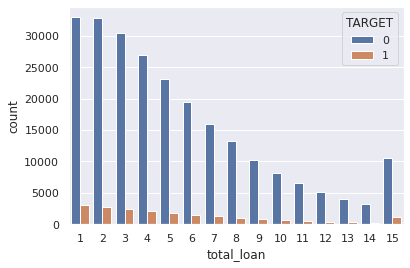

In [13]:
ax = sns.countplot(x="total_loan", data=bureau, hue= 'TARGET')

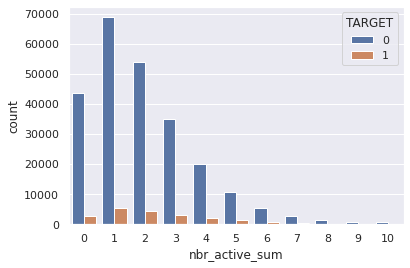

In [14]:
#nbr_active_sum
bureau["nbr_active_sum"] = bureau["nbr_active_sum"].clip(0,10)
ax = sns.countplot(x="nbr_active_sum", data=bureau, hue= 'TARGET')

In [15]:
print_crosstab(bureau, 'nbr_active_sum')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
nbr_active_sum,,,,,,
0,43720,2621,46341,5.656,12.868,17.587
1,68843,5260,74103,7.098,25.825,28.124
2,54037,4346,58383,7.444,21.337,22.157
3,34871,3140,38011,8.261,15.416,14.426
4,20006,2035,22041,9.233,9.991,8.365
5,10766,1285,12051,10.663,6.309,4.574
6,5393,714,6107,11.692,3.505,2.318
7,2727,429,3156,13.593,2.106,1.198
8,1422,226,1648,13.714,1.110,0.625


In [16]:
# More the active loans higher the chances of Default

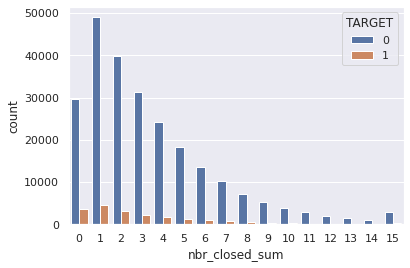

In [17]:
#nbr_closed_sum
bureau["nbr_closed_sum"] = bureau["nbr_closed_sum"].clip(0,15)
ax = sns.countplot(x="nbr_closed_sum", data=bureau, hue= 'TARGET')

In [18]:
print_crosstab(bureau, 'nbr_closed_sum')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
nbr_closed_sum,,,,,,
0,29632,3694,33326,11.084,18.136,12.648
1,49034,4471,53505,8.356,21.951,20.306
2,39911,3180,43091,7.380,15.613,16.354
3,31366,2303,33669,6.840,11.307,12.778
4,24196,1718,25914,6.630,8.435,9.835
5,18315,1326,19641,6.751,6.510,7.454
6,13595,1015,14610,6.947,4.983,5.545
7,10158,761,10919,6.970,3.736,4.144
8,7177,474,7651,6.195,2.327,2.904


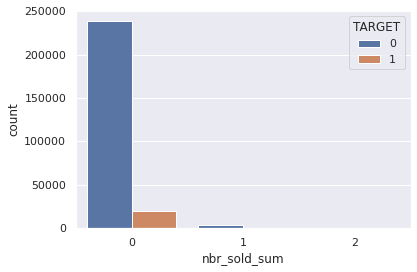

In [19]:
#nbr_sold_sum
bureau["nbr_sold_sum"] = bureau["nbr_sold_sum"].clip(0,2)
ax = sns.countplot(x="nbr_sold_sum", data=bureau, hue= 'TARGET')

In [20]:
print_crosstab(bureau, 'nbr_sold_sum')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
nbr_sold_sum,,,,,,
0,238432,19833,258265,7.679,97.373,98.017
1,4355,500,4855,10.299,2.455,1.843
2,336,35,371,9.434,0.172,0.141
Total,243123,20368,263491,7.730,100.000,100.000


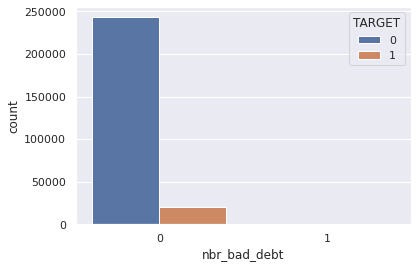

In [21]:
#nbr_bad_debt
ax = sns.countplot(x="nbr_bad_debt", data=bureau, hue= 'TARGET')

In [22]:
print_crosstab(bureau, 'nbr_bad_debt')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
nbr_bad_debt,,,,,,
0,243107,20364,263471,7.729,99.98,99.992
1,16,4,20,20.000,0.02,0.008
Total,243123,20368,263491,7.730,100.00,100.000


In [23]:
# Drop nbr_bad_debt 
bureau = bureau.drop("nbr_bad_debt", axis=1)

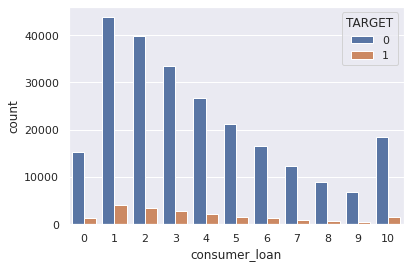

In [24]:
#consumer_loan
bureau["consumer_loan"] = bureau["consumer_loan"].clip(0,10)
ax = sns.countplot(x="consumer_loan", data=bureau, hue= 'TARGET')

In [25]:
print_crosstab(bureau, 'consumer_loan')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
consumer_loan,,,,,,
0,15207,1435,16642,8.623,7.045,6.316
1,43797,4070,47867,8.503,19.982,18.166
2,39770,3420,43190,7.918,16.791,16.391
3,33387,2729,36116,7.556,13.398,13.707
4,26617,2080,28697,7.248,10.212,10.891
5,21277,1591,22868,6.957,7.811,8.679
6,16628,1293,17921,7.215,6.348,6.801
7,12252,993,13245,7.497,4.875,5.027
8,8970,734,9704,7.564,3.604,3.683


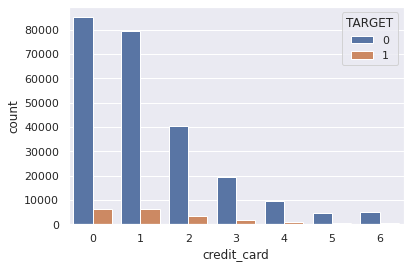

In [26]:
#credit_card
bureau["credit_card"] = bureau["credit_card"].clip(0,6)
ax = sns.countplot(x="credit_card", data=bureau, hue= 'TARGET')

In [27]:
print_crosstab(bureau, 'credit_card')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
credit_card,,,,,,
0,85061,6388,91449,6.985,31.363,34.707
1,79550,6471,86021,7.523,31.770,32.647
2,40203,3520,43723,8.051,17.282,16.594
3,19479,1854,21333,8.691,9.103,8.096
4,9375,977,10352,9.438,4.797,3.929
5,4563,545,5108,10.670,2.676,1.939
6,4892,613,5505,11.135,3.010,2.089
Total,243123,20368,263491,7.730,100.000,100.000


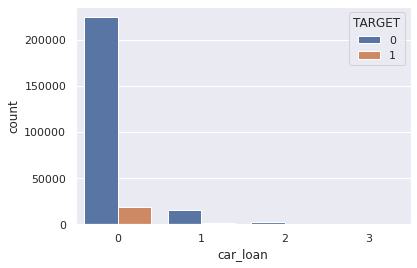

In [28]:
#credit_card
bureau["car_loan"] = bureau["car_loan"].clip(0,3)
ax = sns.countplot(x="car_loan", data=bureau, hue= 'TARGET')

In [29]:
print_crosstab(bureau, 'car_loan')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
car_loan,,,,,,
0,224681,19235,243916,7.886,94.437,92.571
1,15280,969,16249,5.963,4.757,6.167
2,2525,140,2665,5.253,0.687,1.011
3,637,24,661,3.631,0.118,0.251
Total,243123,20368,263491,7.730,100.000,100.000


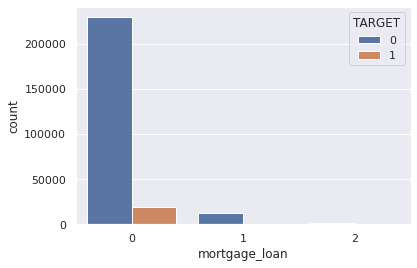

In [30]:
#car_loan
bureau["mortgage_loan"] = bureau["mortgage_loan"].clip(0,2)
ax = sns.countplot(x="mortgage_loan", data=bureau, hue= 'TARGET')

In [31]:
print_crosstab(bureau, 'mortgage_loan')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
mortgage_loan,,,,,,
0,229556,19630,249186,7.878,96.377,94.571
1,12467,700,13167,5.316,3.437,4.997
2,1100,38,1138,3.339,0.187,0.432
Total,243123,20368,263491,7.730,100.000,100.000


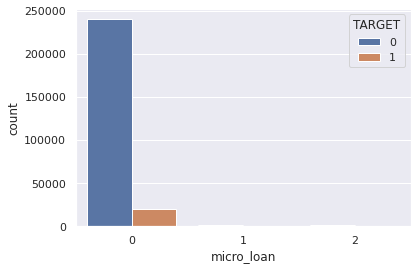

In [32]:
#micro_loan
bureau["micro_loan"] = bureau["micro_loan"].clip(0,2)
ax = sns.countplot(x="micro_loan", data=bureau, hue= 'TARGET')

In [33]:
print_crosstab(bureau, 'micro_loan')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
micro_loan,,,,,,
0,240326,19666,259992,7.564,96.553,98.672
1,1529,360,1889,19.058,1.767,0.717
2,1268,342,1610,21.242,1.679,0.611
Total,243123,20368,263491,7.730,100.000,100.000


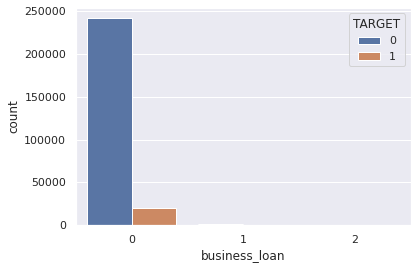

In [34]:
#business_loan
bureau["business_loan"] = bureau["business_loan"].clip(0,2)
ax = sns.countplot(x="business_loan", data=bureau, hue= 'TARGET')

In [35]:
print_crosstab(bureau, 'business_loan')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
business_loan,,,,,,
0,241808,20277,262085,7.737,99.553,99.466
1,1103,76,1179,6.446,0.373,0.447
2,212,15,227,6.608,0.074,0.086
Total,243123,20368,263491,7.730,100.000,100.000


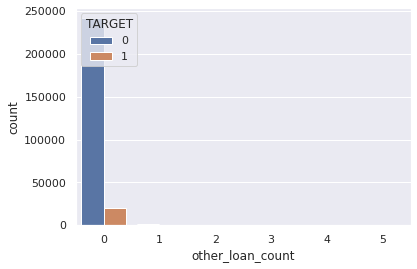

In [36]:
#Other_Loan_Count
#bureau["other_loan_count"] = bureau["other_loan_count"].clip(0,2)
ax = sns.countplot(x="other_loan_count", data=bureau, hue= 'TARGET')

In [37]:
print_crosstab(bureau, 'other_loan_count')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
other_loan_count,,,,,,
0,241645,20235,261880,7.727,99.347,99.389
1,1369,127,1496,8.489,0.624,0.568
2,89,6,95,6.316,0.029,0.036
3,14,0,14,0.000,0.000,0.005
4,3,0,3,0.000,0.000,0.001
5,3,0,3,0.000,0.000,0.001
Total,243123,20368,263491,7.730,100.000,100.000


In [38]:
bureau = bureau.drop("other_loan_count", axis =1)

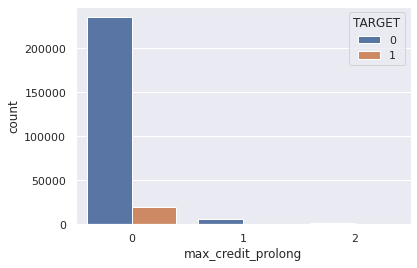

In [39]:
#max_credit_prolong
bureau["max_credit_prolong"] = bureau["max_credit_prolong"].clip(0,2)
ax = sns.countplot(x="max_credit_prolong", data=bureau, hue= 'TARGET')

In [40]:
print_crosstab(bureau, 'max_credit_prolong')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
max_credit_prolong,,,,,,
0,235356,19627,254983,7.697,96.362,96.771
1,6437,628,7065,8.889,3.083,2.681
2,1330,113,1443,7.831,0.555,0.548
Total,243123,20368,263491,7.730,100.000,100.000


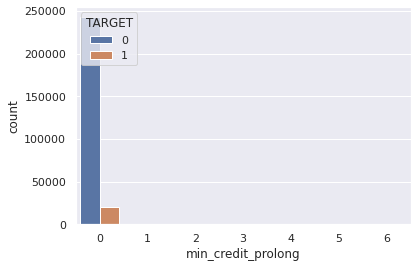

In [41]:
#max_credit_prolong
#bureau["min_credit_prolong"] = bureau["min_credit_prolong"].clip(0,2)
ax = sns.countplot(x="min_credit_prolong", data=bureau, hue= 'TARGET')

In [42]:
print_crosstab(bureau, 'min_credit_prolong')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
min_credit_prolong,,,,,,
0,242838,20346,263184,7.731,99.892,99.883
1,233,15,248,6.048,0.074,0.094
2,42,7,49,14.286,0.034,0.019
3,6,0,6,0.000,0.000,0.002
4,2,0,2,0.000,0.000,0.001
5,1,0,1,0.000,0.000,0.000
6,1,0,1,0.000,0.000,0.000
Total,243123,20368,263491,7.730,100.000,100.000


In [43]:
#avg_credit_prolong
bureau["min_credit_prolong"] = bureau["min_credit_prolong"].clip(0,2)
bureau = bureau.drop(['avg_credit_prolong', 'min_credit_prolong'], axis=1)

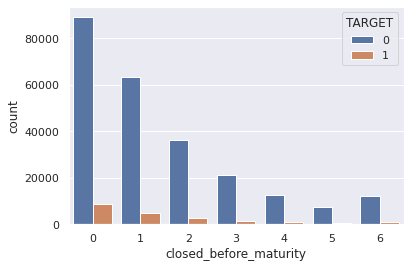

In [44]:
#closed_before_maturity
bureau["closed_before_maturity"] = bureau["closed_before_maturity"].clip(0,6)
ax = sns.countplot(x="closed_before_maturity", data=bureau, hue= 'TARGET')

In [45]:
print_crosstab(bureau, 'closed_before_maturity')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
closed_before_maturity,,,,,,
0,89131,8918,98049,9.095,43.784,37.212
1,63553,4956,68509,7.234,24.332,26.001
2,36491,2649,39140,6.768,13.006,14.854
3,21310,1446,22756,6.354,7.099,8.636
4,12795,868,13663,6.353,4.262,5.185
5,7512,550,8062,6.822,2.700,3.060
6,12331,981,13312,7.369,4.816,5.052
Total,243123,20368,263491,7.730,100.000,100.000


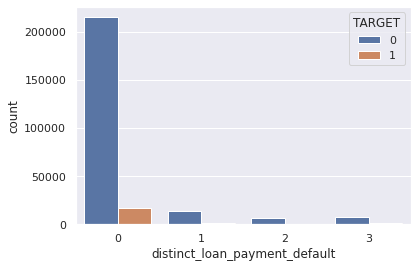

In [46]:
#distinct_loan_payment_default
bureau["distinct_loan_payment_default"] = bureau["distinct_loan_payment_default"].clip(0,3)
ax = sns.countplot(x="distinct_loan_payment_default", data=bureau, hue= 'TARGET')

In [47]:
print_crosstab(bureau, 'distinct_loan_payment_default')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
distinct_loan_payment_default,,,,,,
0,215163,17276,232439,7.432,84.819,88.215
1,13776,1464,15240,9.606,7.188,5.784
2,6292,674,6966,9.676,3.309,2.644
3,7892,954,8846,10.785,4.684,3.357
Total,243123,20368,263491,7.730,100.000,100.000


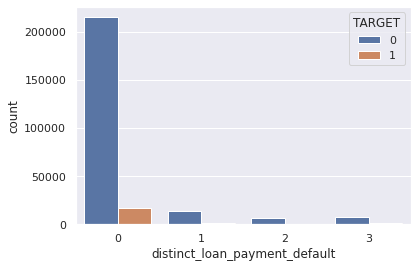

In [48]:
#distinct_loan_payment_default
bureau["distinct_loan_payment_default"] = bureau["distinct_loan_payment_default"].clip(0,3)
ax = sns.countplot(x="distinct_loan_payment_default", data=bureau, hue= 'TARGET')

In [49]:
print_crosstab(bureau, 'max_loan_payment_default_days')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
max_loan_payment_default_days,,,,,,
0.0,215163,17276,232439,7.432,84.819,88.215
1.0,22203,2483,24686,10.058,12.191,9.369
2.0,2702,259,2961,8.747,1.272,1.124
3.0,726,68,794,8.564,0.334,0.301
4.0,366,39,405,9.630,0.191,0.154
5.0,1963,243,2206,11.015,1.193,0.837
Total,243123,20368,263491,7.730,100.000,100.000


In [50]:
bureau["max_loan_tenure"] = bureau.apply(lambda x:abs(x["max_loan_tenure"]//365), axis=1)

In [51]:
bureau["min_loan_tenure"] = bureau.apply(lambda x:abs(x["min_loan_tenure"]//365), axis=1)
bureau["avg_loan_tenure"] = bureau.apply(lambda x:abs(x["avg_loan_tenure"]//365), axis=1)

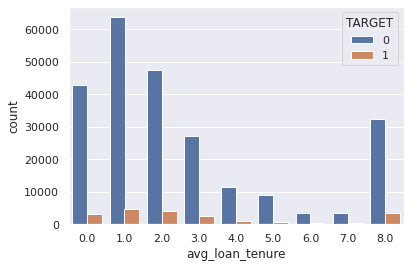

In [54]:
#distinct_loan_payment_default
bureau["avg_loan_tenure"] = bureau["avg_loan_tenure"].clip(0,8)
ax = sns.countplot(x="avg_loan_tenure", data=bureau, hue= 'TARGET')

In [55]:
print_crosstab(bureau, 'avg_loan_tenure')

TARGET,0,1,Total,Default %,Default %- Overall,Population %- Overall
avg_loan_tenure,,,,,,
0.0,42782,3199,45981,6.957,15.890,17.601
1.0,63722,4807,68529,7.015,23.877,26.232
2.0,47549,4004,51553,7.767,19.889,19.734
3.0,27263,2451,29714,8.249,12.175,11.374
4.0,11421,973,12394,7.851,4.833,4.744
5.0,9034,744,9778,7.609,3.696,3.743
6.0,3630,280,3910,7.161,1.391,1.497
7.0,3346,263,3609,7.287,1.306,1.381
8.0,32363,3411,35774,9.535,16.943,13.694


In [56]:
bureau = bureau.fillna(bureau.median())

In [57]:
bureau.head()

,SK_ID_CURR,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,total_loan,nbr_closed_sum,nbr_active_sum,nbr_sold_sum,consumer_loan,credit_card,car_loan,mortgage_loan,micro_loan,business_loan,max_credit_prolong,max_loan_tenure,min_loan_tenure,avg_loan_tenure,closed_before_maturity,distinct_loan_payment_default,max_loan_payment_default_days
0,100002,1,0.083037,0.262949,0.139376,8,6,2,0,4,4,0,0,0,0,0,4.0,0.0,1.0,3,3,1.0
1,100003,0,0.311267,0.622246,-1.000000,4,3,1,0,2,2,0,0,0,0,0,4.0,0.0,2.0,1,0,0.0
2,100004,0,-1.000000,0.555912,0.729567,2,2,0,0,2,0,0,0,0,0,0,2.0,0.0,1.0,1,0,0.0
3,100007,0,-1.000000,0.322738,-1.000000,1,1,0,0,1,0,0,0,0,0,0,1.0,1.0,1.0,0,0,0.0
4,100008,0,-1.000000,0.354225,0.621226,3,2,1,0,3,0,0,0,0,0,0,1.0,0.0,1.0,1,0,0.0


<AxesSubplot:>

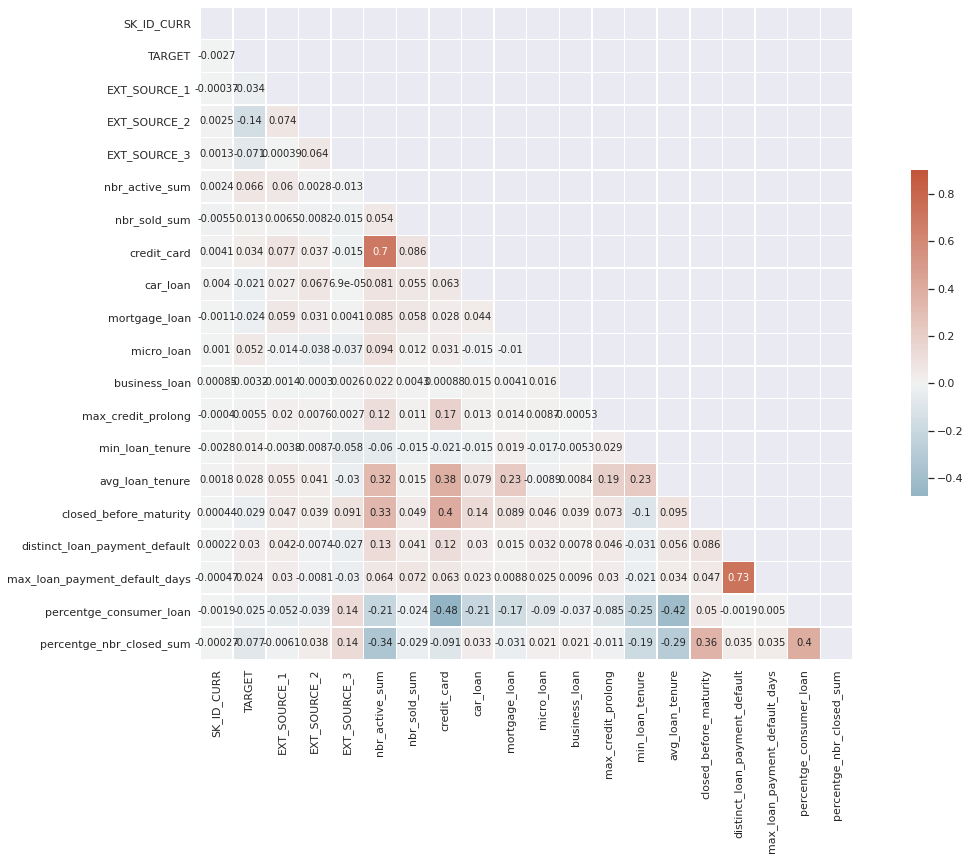

In [72]:
# Visualize the the numerical variables
# 1. Check the correlation with each other
corr = bureau.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot= True)

In [63]:
# Top 10 highly correlated variables
corr_dict = dict()
for col1 in bureau.columns:
    for col2 in bureau.columns:
        if col1 != col2:
            #print(col1, col2)
            corr_val = bureau[col1].corr(bureau[col2]).round(3)
            if col2 + " - "+ col1 not in list(corr_dict.keys()):
                corr_dict[col1 + " - "+ col2] = corr_val

In [64]:
sorted(corr_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse= True)  

[('total_loan - consumer_loan', 0.924),
 ('total_loan - nbr_closed_sum', 0.906),
 ('nbr_closed_sum - consumer_loan', 0.888),
 ('max_loan_tenure - avg_loan_tenure', 0.817),
 ('nbr_closed_sum - closed_before_maturity', 0.753),
 ('distinct_loan_payment_default - max_loan_payment_default_days', 0.725),
 ('total_loan - closed_before_maturity', 0.713),
 ('nbr_active_sum - credit_card', 0.699),
 ('total_loan - nbr_active_sum', 0.696),
 ('consumer_loan - closed_before_maturity', 0.683),
 ('total_loan - credit_card', 0.645),
 ('nbr_active_sum - consumer_loan', 0.539),
 ('nbr_closed_sum - credit_card', 0.462),
 ('credit_card - max_loan_tenure', 0.411),
 ('credit_card - closed_before_maturity', 0.401),
 ('credit_card - avg_loan_tenure', 0.383),
 ('nbr_closed_sum - nbr_active_sum', 0.367),
 ('consumer_loan - credit_card', 0.361),
 ('nbr_active_sum - closed_before_maturity', 0.33),
 ('nbr_active_sum - avg_loan_tenure', 0.32),
 ('nbr_active_sum - max_loan_tenure', 0.315),
 ('total_loan - max_loan_te

In [65]:
# TOTAL LOAN Is highly correlated with count of other loans
# Let's divide the total_loan value to all the other loans
bureau["percentge_consumer_loan"] = bureau.apply(lambda x:abs(x["consumer_loan"]/x["total_loan"]), axis=1)
bureau["percentge_nbr_closed_sum"] = bureau.apply(lambda x:abs(x["nbr_closed_sum"]/x["total_loan"]), axis=1)

In [66]:
bureau = bureau.drop(["consumer_loan", "total_loan", "nbr_closed_sum"], axis= 1)

In [68]:
bureau.head()

,SK_ID_CURR,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,nbr_active_sum,nbr_sold_sum,credit_card,car_loan,mortgage_loan,micro_loan,business_loan,max_credit_prolong,max_loan_tenure,min_loan_tenure,avg_loan_tenure,closed_before_maturity,distinct_loan_payment_default,max_loan_payment_default_days,percentge_consumer_loan,percentge_nbr_closed_sum
0,100002,1,0.083037,0.262949,0.139376,2,0,4,0,0,0,0,0,4.0,0.0,1.0,3,3,1.0,0.5,0.750000
1,100003,0,0.311267,0.622246,-1.000000,1,0,2,0,0,0,0,0,4.0,0.0,2.0,1,0,0.0,0.5,0.750000
2,100004,0,-1.000000,0.555912,0.729567,0,0,0,0,0,0,0,0,2.0,0.0,1.0,1,0,0.0,1.0,1.000000
3,100007,0,-1.000000,0.322738,-1.000000,0,0,0,0,0,0,0,0,1.0,1.0,1.0,0,0,0.0,1.0,1.000000
4,100008,0,-1.000000,0.354225,0.621226,1,0,0,0,0,0,0,0,1.0,0.0,1.0,1,0,0.0,1.0,0.666667


In [71]:
# Top 10 highly correlated variables
corr_dict = dict()
for col1 in bureau.columns:
    for col2 in bureau.columns:
        if col1 != col2:
            #print(col1, col2)
            corr_val = bureau[col1].corr(bureau[col2]).round(3)
            if col2 + " - "+ col1 not in list(corr_dict.keys()):
                corr_dict[col1 + " - "+ col2] = corr_val
sorted(corr_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse= True)  

[('distinct_loan_payment_default - max_loan_payment_default_days', 0.725),
 ('nbr_active_sum - credit_card', 0.699),
 ('credit_card - closed_before_maturity', 0.401),
 ('percentge_consumer_loan - percentge_nbr_closed_sum', 0.396),
 ('credit_card - avg_loan_tenure', 0.383),
 ('closed_before_maturity - percentge_nbr_closed_sum', 0.357),
 ('nbr_active_sum - closed_before_maturity', 0.33),
 ('nbr_active_sum - avg_loan_tenure', 0.32),
 ('mortgage_loan - avg_loan_tenure', 0.232),
 ('min_loan_tenure - avg_loan_tenure', 0.231),
 ('max_credit_prolong - avg_loan_tenure', 0.191),
 ('credit_card - max_credit_prolong', 0.173),
 ('car_loan - closed_before_maturity', 0.141),
 ('EXT_SOURCE_3 - percentge_consumer_loan', 0.141),
 ('EXT_SOURCE_3 - percentge_nbr_closed_sum', 0.137),
 ('nbr_active_sum - distinct_loan_payment_default', 0.129),
 ('nbr_active_sum - max_credit_prolong', 0.117),
 ('credit_card - distinct_loan_payment_default', 0.116),
 ('avg_loan_tenure - closed_before_maturity', 0.095),
 ('nbr

In [70]:
bureau = bureau.drop(["max_loan_tenure"], axis= 1)

In [58]:
#Model Building

(263491, 22)

In [73]:
bureau.to_csv("Prepared_Data/bureau.csv", index =False)